In [0]:
# Titanic Kaggle Competition 

In [1]:
# import libraries
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
from sklearn import preprocessing, tree, model_selection, metrics, svm, feature_selection, linear_model

Shape Train:  (891, 12) 

Columns Train:  ['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'] 

        PassengerId    Survived      Pclass                          Name  \
count    891.000000  891.000000  891.000000                           891   
unique          NaN         NaN         NaN                           891   
top             NaN         NaN         NaN  Carlsson, Mr. August Sigfrid   
freq            NaN         NaN         NaN                             1   
mean     446.000000    0.383838    2.308642                           NaN   
std      257.353842    0.486592    0.836071                           NaN   
min        1.000000    0.000000    1.000000                           NaN   
25%      223.500000    0.000000    2.000000                           NaN   
50%      446.000000    0.000000    3.000000                           NaN   
75%      668.500000    1.000000    3.000000                          

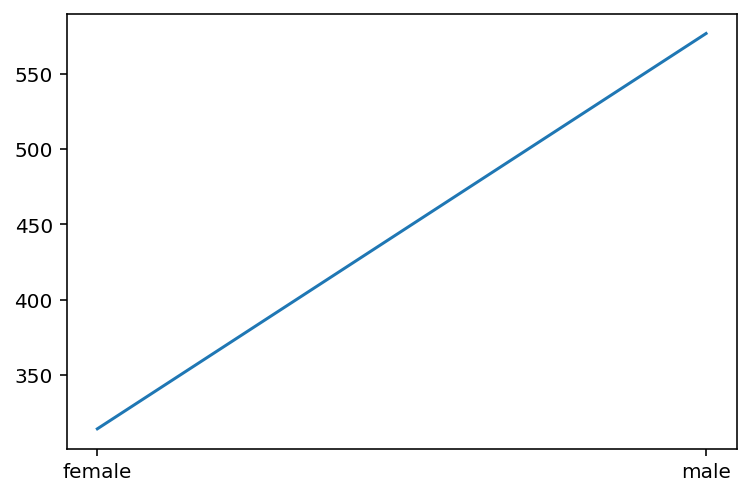

Embarked
C    168
Q     77
S    644
Name: Embarked, dtype: int64


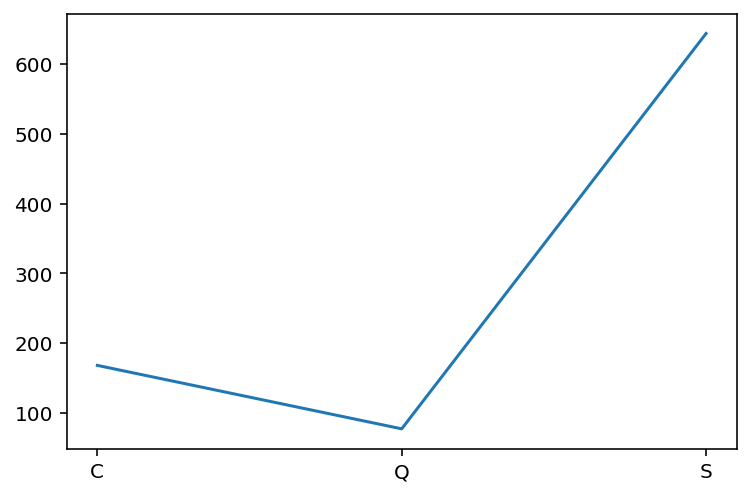

In [2]:
# Import and explore data
train_data = pd.read_csv("train.csv")
test_data  = pd.read_csv("test.csv")

print("Shape Train: ", train_data.shape, "\n")
print("Columns Train: ", list(train_data.columns), "\n")
print(train_data.describe(include = 'all'))
print(train_data.dtypes)
print(train_data.head(3))


print("Missing Values:")
train_data.isna().sum()
test_data.isna().sum()

for col in train_data.select_dtypes(exclude = "number").columns:
    vals = train_data.groupby(col)[col].count()
    if(len(vals) < 10):
        plt.plot(vals)
        print(vals)
        plt.show()

#train_data.head

# Categorical
# Decision Trees - 1
# Logistic Regression - 3 
# SVM - 2
# KNN - 5
# Random Forest - 1*

# What do we know
# Data is labeled --> supervised
# Not very much data so we can used whatever algorithm we like

/ext/anaconda-2019.03/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/ext/anaconda-2019.03/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


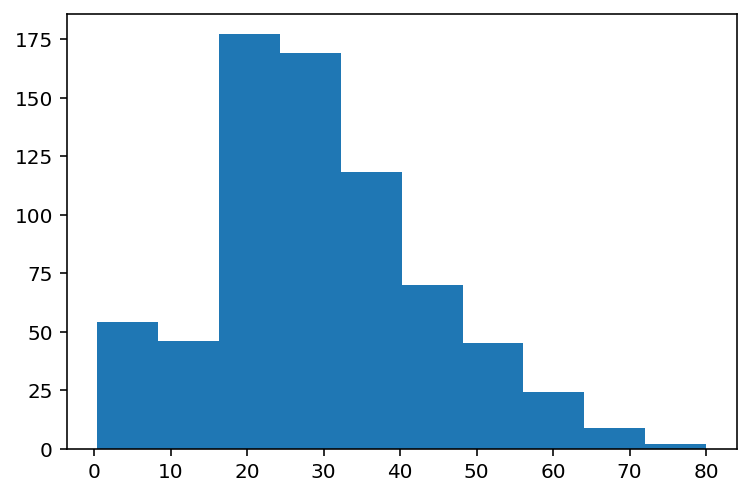

In [3]:
train_data["Cabin"] = train_data["Cabin"].fillna("NA")
train_data["Embarked"] = train_data["Embarked"].fillna("NA")

# Ages turn into age groups
plt.hist(train_data["Age"])
plt.show()

binned_age = pd.cut(train_data["Age"], [0, 19, 25, 32, 41, 1000])
binned_results_age = pd.cut(test_data["Age"], [0, 19, 25, 32, 41, 1000])

# Names turn into titles


In [4]:
# Probability of survival by Class
print(train_data.groupby("Pclass")["Survived"].sum()/train_data.groupby("Pclass")["Survived"].count(), "\n")

# Probability of survival by Sex
print(train_data.groupby("Sex")["Survived"].sum()/train_data.groupby("Sex")["Survived"].count(), "\n")

# Probability of survival by Fare
print(train_data.groupby("Fare")["Survived"].sum()/train_data.groupby("Fare")["Survived"].count(), "\n")

# Probability of survival by Fare
print(train_data.groupby("Parch")["Survived"].sum()/train_data.groupby("Parch")["Survived"].count(), "\n")

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64 

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64 

Fare
0.0000      0.066667
4.0125      0.000000
5.0000      0.000000
6.2375      0.000000
6.4375      0.000000
              ...   
227.5250    0.750000
247.5208    0.500000
262.3750    1.000000
263.0000    0.500000
512.3292    1.000000
Name: Survived, Length: 248, dtype: float64 

Parch
0    0.343658
1    0.550847
2    0.500000
3    0.600000
4    0.000000
5    0.200000
6    0.000000
Name: Survived, dtype: float64 



['Capt' 'Col' 'Don' 'Dr' 'Jonkheer' 'Lady' 'Major' 'Master' 'Miss' 'Mlle'
 'Mme' 'Mr' 'Mrs' 'Ms' 'Rev' 'Sir' 'the Countess']
['Col' 'Dona' 'Dr' 'Master' 'Miss' 'Mr' 'Mrs' 'Ms' 'Rev']


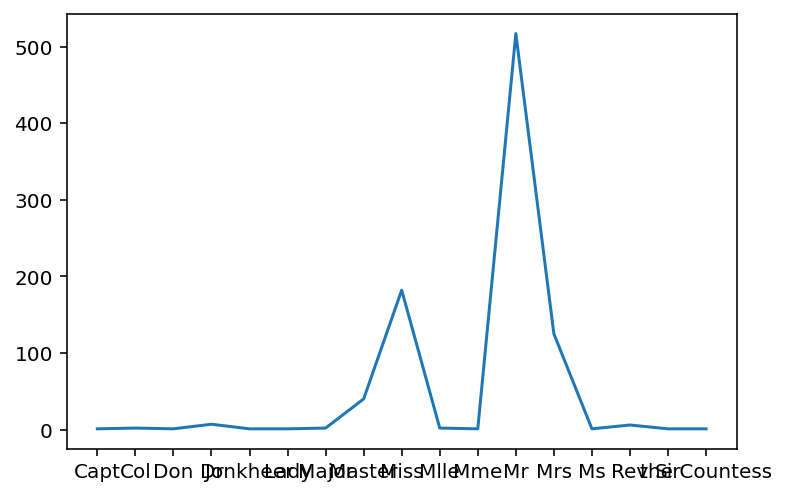

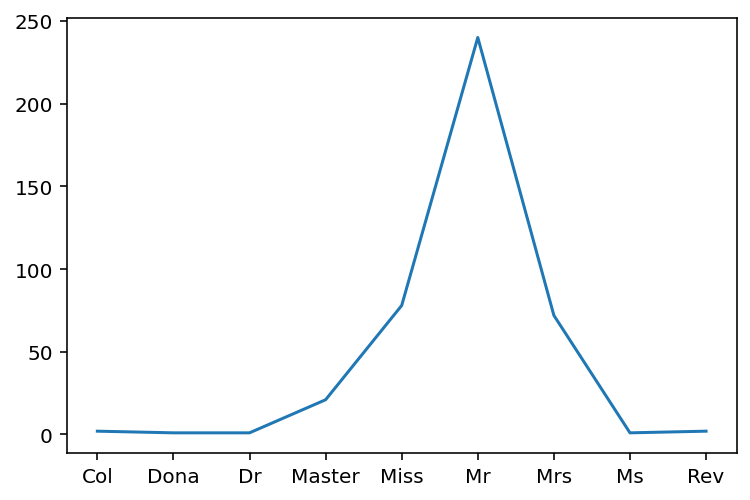

In [5]:
title_arr = []
for name in train_data["Name"]:
    start = name.find(',')
    end = name.find('.')
    title_arr.append(name[start+2:end])

train_data["Title"] = title_arr
  
title_results_arr = []
for name in test_data["Name"]:
    start = name.find(',')
    end = name.find('.')
    title_results_arr.append(name[start+2:end])

test_data["Title"] = title_results_arr

titles_cnt = train_data.groupby("Title")["Title"].count()
print(np.unique(train_data["Title"]))
print(np.unique(test_data["Title"]))


plt.plot(titles_cnt)
plt.show()

titles_results_cnt = test_data.groupby("Title")["Title"].count()

plt.plot(titles_results_cnt)
plt.show()

In [6]:
test_data["Cabin"] = test_data["Cabin"].fillna("NA")
test_data["Embarked"] = test_data["Embarked"].fillna("NA")

features = ["EncodedSex"]

# Encode string Sex feature into numeric
sex_encoder = preprocessing.LabelEncoder()
sex_encoder.fit(train_data["Sex"])
train_data["EncodedSex"] = list(sex_encoder.transform(train_data["Sex"]))

sex_encoder_results = preprocessing.LabelEncoder()
sex_encoder_results.fit(test_data["Sex"])
test_data["EncodedSex"] = list(sex_encoder_results.transform(test_data["Sex"]))



# Reshape array to fit dimensions required by OneHotEncoder
#pclass_encode_array = np.array(train_data["Pclass"]).reshape(-1, 1)

# Encode int Pclass feature into OneHotEncoding - sparse = sparse array one 1, rest zeros
#pclass_encoder = preprocessing.OneHotEncoder(sparse = "true")
#pclass_encoder.fit(pclass_encode_array)

# Need list otherwise the array is merged into 1
#train_data["EncodedPclass"] = list(pclass_encoder.transform(pclass_encode_array).toarray())

# Reshape array to fit dimensions required by OneHotEncoder
#parch_encode_array = np.array(train_data["Parch"]).reshape(-1, 1)

# Create encoder for One Hot Encoding
#parch_encoder = preprocessing.OneHotEncoder(sparse = "true")
#parch_encoder.fit(parch_encode_array)

#train_data["EncodedParch"] = list(parch_encoder.transform(parch_encode_array).toarray())
X_results = test_data[features]

results_pclass = pd.get_dummies(test_data["Pclass"])
results_pclass = results_pclass.add_suffix("_Pclass")

results_parch = pd.get_dummies(test_data["Parch"])
results_parch = results_parch.add_suffix("_Parch")

results_age = pd.get_dummies(binned_results_age)
results_age = results_age.add_suffix("_Age")

results_title = pd.get_dummies(test_data["Title"])
results_title = results_title.add_suffix("_Title")

X_results = pd.concat([X_results, results_pclass, results_parch, results_age, results_title], axis = 1)
X_results["Dona_Title"] = X_results.shape[0] * 0
X_results['Jonkheer_Title'] = X_results.shape[0] * 0
X_results['Lady_Title'] = X_results.shape[0] * 0
X_results['Major_Title'] = X_results.shape[0] * 0
X_results['Mlle_Title'] = X_results.shape[0] * 0
X_results['Mme_Title'] = X_results.shape[0] * 0
X_results['Sir_Title'] = X_results.shape[0] * 0
X_results['the Countess_Title'] = X_results.shape[0] * 0
X_results['Capt_Title'] = X_results.shape[0] * 0



X = train_data[features]
encoded_pclass = pd.get_dummies(train_data["Pclass"])
encoded_pclass = encoded_pclass.add_suffix("_Pclass")

encoded_parch = pd.get_dummies(train_data["Parch"])
encoded_parch = encoded_parch.add_suffix("_Parch")

encoded_age = pd.get_dummies(binned_age)
encoded_age = encoded_age.add_suffix("_Age")

encoded_title = pd.get_dummies(train_data["Title"])
encoded_title = encoded_title.add_suffix("_Title")

X = pd.concat([X, encoded_pclass, encoded_parch, encoded_age, encoded_title], axis = 1)
X["9_Parch"] = X.shape[0] * 0
   
y = train_data["Survived"]

X_new = feature_selection.SelectKBest(feature_selection.chi2, k = 10).fit(X, y)

#mask = X_new.get_support()
selected = X_new.get_support()
new_features = X.columns[selected]
new_features

Index(['EncodedSex', '1_Pclass', '2_Pclass', '3_Pclass', '1_Parch',
       '(0, 19]_Age', 'Master_Title', 'Miss_Title', 'Mr_Title', 'Mrs_Title'],
      dtype='object')

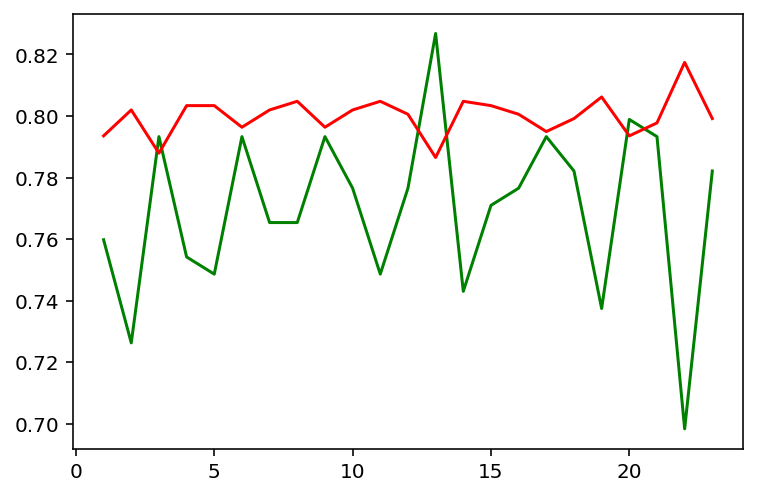

[0.7821229050279329, 0.7821229050279329, 0.7821229050279329, 0.7821229050279329, 0.7821229050279329, 0.7821229050279329, 0.7821229050279329, 0.7821229050279329, 0.7821229050279329, 0.7821229050279329, 0.7821229050279329, 0.7821229050279329, 0.7821229050279329, 0.7821229050279329, 0.7821229050279329, 0.7821229050279329, 0.7821229050279329, 0.7821229050279329, 0.7821229050279329]
[0.8019662921348315, 0.7879213483146067, 0.8033707865168539, 0.8033707865168539, 0.7963483146067416, 0.8019662921348315, 0.8047752808988764, 0.7963483146067416, 0.8019662921348315, 0.8047752808988764, 0.800561797752809, 0.7865168539325843, 0.8047752808988764, 0.8033707865168539, 0.800561797752809, 0.7949438202247191, 0.7991573033707865, 0.8061797752808989, 0.7935393258426966]


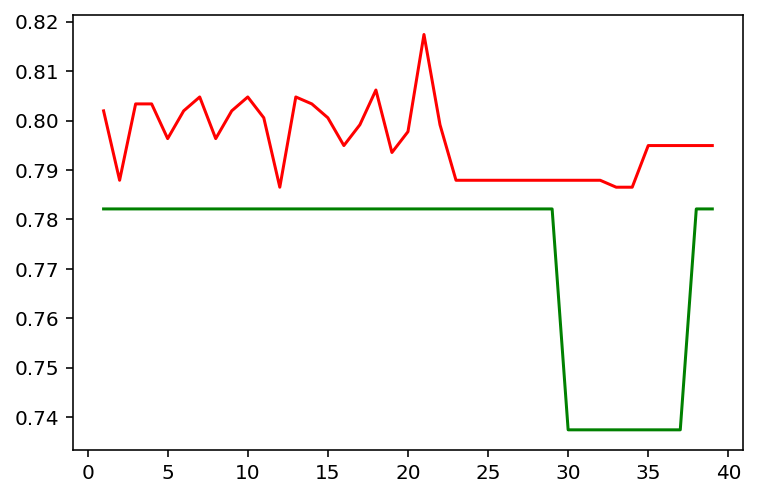

In [11]:
accuracy_arr = []
train_arr = []

X = X[['EncodedSex', '1_Pclass', '3_Pclass', '1_Parch', 'Miss_Title',
       'Mr_Title', 'Mrs_Title']]
X_results = X_results[['EncodedSex', '1_Pclass', '3_Pclass', '1_Parch', 'Miss_Title',
       'Mr_Title', 'Mrs_Title']]

for i in range(1, 24):
    X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size = 0.2)

    clf = tree.DecisionTreeClassifier(max_depth = i, criterion = "entropy")
    clf = clf.fit(X_train, y_train)
    predictions = clf.predict(X_test)
    train_pred = clf.predict(X_train)

    train_arr.append(metrics.accuracy_score(train_pred, y_train))    
    accuracy_arr.append(metrics.accuracy_score(predictions, y_test))

plt.plot(np.arange(1,24), accuracy_arr, color = 'green')
plt.plot(np.arange(1,24), train_arr, color = 'red')
plt.show()

accuracy_arr = []

for i in np.arange(0.05, 1, 0.05):
    for j in np.arange(0.05, 1, 0.05):
        X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size = 0.2, random_state = 42)

        clf = svm.SVC(C = i, gamma = j)
        clf = clf.fit(X_train, y_train)
        predictions = clf.predict(X_test)
        train_pred = clf.predict(X_train)

        train_arr.append(metrics.accuracy_score(train_pred, y_train))
        accuracy_arr.append(metrics.accuracy_score(predictions, y_test))
    
plt.plot(np.arange(1, 40), accuracy_arr[1:40], color = "green")
plt.plot(np.arange(1, 40), train_arr[1:40], color = "red")

print(accuracy_arr[1:20])
print(train_arr[1:20])
#plt.plot(np.arange(1,12), accuracy_arr)
#plt.plot(np.arange(1,12), train_arr)


#clf.predict(test_data[["Sex", "Pclass", "Parch"]])
#train_data.EncodedSex.dtype
#train_data[features]
#Need to transform test data too, should probably combine them from the beginning
#1) Combine data and change train and test to data
#2) turn into train and test after data cleaning and transformation
#3) build decision tree
#4) cross validation and mess with hyperparameters


#test_data[["Sex", "Pclass"]]



In [16]:
clf = tree.DecisionTreeClassifier(max_depth = 5)
clf = clf.fit(X, y)
predictions = clf.predict(X_results)

#clf = svm.SVC(C = 0.05, gamma = 0.55)
#clf = clf.fit(X, y)
#predictions = clf.predict(X_results)

results = {"PassengerId": test_data["PassengerId"], "Survived": predictions}
results_df = pd.DataFrame(data = results)

In [17]:
results_df.to_csv('titanic_results.csv', index = False)